<a href="https://colab.research.google.com/github/Macaltenor/CIS9650/blob/main/Group_6_Question_3_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3

In [2]:
sports_team = {'mens_vb':  ['https://ccnyathletics.com/sports/mens-volleyball/roster',
                            'https://lehmanathletics.com/sports/mens-volleyball/roster',
                            'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster',
                            'https://johnjayathletics.com/sports/mens-volleyball/roster',
                            'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster',
                            'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster',
                            'https://yorkathletics.com/sports/mens-volleyball/roster',
                            'https://ballstatesports.com/sports/mens-volleyball/roster'],
               'womens_vb':['https://bmccathletics.com/sports/womens-volleyball/roster/2022',
                            'https://yorkathletics.com/sports/mens-swimming-and-diving/roster?view=1',
                            'https://hostosathletics.com/sports/womens-volleyball/roster/2022-2023',
                            'https://bronxbroncos.com/sports/womens-volleyball/roster/2021',
                            'https://queensknights.com/sports/womens-volleyball/roster?view=1',
                            'https://augustajags.com/sports/wvball/roster',
                            'https://flaglerathletics.com/sports/womens-volleyball/roster',
                            'https://pacersports.com/sports/womens-volleyball/roster?view=1',
                            'https://www.golhu.com/sports/womens-volleyball/roster'],
               'mens_swim':['https://csidolphins.com/sports/mens-swimming-and-diving/roster/2023-2024?view=1',
                            'https://yorkathletics.com/sports/mens-swimming-and-diving/roster?view=1',
                            'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster/2023-24',
                            'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster/2022-23',
                            'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster/2021-22',
                            'https://mckbearcats.com/sports/mens-swimming-and-diving/roster/2023-24',
                            'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster',
                            'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster?view=1',
                            'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22',
                            'https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22'],
             'womens_swim':['https://csidolphins.com/sports/womens-swimming-and-diving/roster/2023-2024?view=1',
                            'https://queensknights.com/sports/womens-swimming-and-diving/roster/2019-20?view=1',
                            'https://yorkathletics.com/sports/womens-swimming-and-diving/roster/2023-24?view=1',
                            'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim',
                            'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster/2022-23',
                            'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster/2021-22',
                            'https://mckbearcats.com/sports/womens-swimming-and-diving/roster',
                            'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster',
                            'https://keanathletics.com/sports/womens-swimming-and-diving/roster',
                            'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster/2021-22?view=1']
                            }


In [3]:
#headers to act human
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'
}

In [4]:
for sport_key in sports_team:
  for url in sports_team[sport_key]:
    page = requests.get(url,headers=headers)
    #print(page.status_code)
    #soup = BeautifulSoup(page.content,'html.parser')
    #print(soup)

DATA SCRAPING FOR MEN VOLLEYBALL TEAM

In [5]:
#Mens Volleyball Roster
player_heights=[]
player_names=[]

for url in sports_team['mens_vb']:
  page = requests.get(url,headers=headers)
  soup = BeautifulSoup(page.content, 'html.parser')
  players = soup.find_all('li',class_ = "sidearm-roster-player")
  for player in players:
    player_div=player.find('div', class_ = 'sidearm-roster-player-name')
    player_name = player_div.find('a').getText()
    player_names.append(player_name)
    raw_heights = player.find('span',class_ = "sidearm-roster-player-height")
    for raw_height in raw_heights:
      x = raw_height.get_text()
      y = x.split("'")
      #print(y)
      feet = int(y[0]) * 12
      #print(feet)
      inches = int(y[1][:-1])
      #print(inches)
      height_in_inches = feet + inches
      #print(height_in_inches)
      player_heights.append(height_in_inches)
#print(player_heights)

data1 = {"Name": player_names,
      "Height": player_heights}
data1['Sport'] = 'Men Volleyball' #Insert sport into the dictionary

mens_vb_df = pd.DataFrame(data1)
mens_vb_df = mens_vb_df.set_index('Name')
mens_vb_df = mens_vb_df.sort_values(['Height'],ascending = False)
mens_vb_df.to_csv('mens_vb_heights.csv')

mens_vb_avg = (sum(player_heights)/len(player_names))
print(f'The average height of the mens volleyball roster is {mens_vb_avg}')

mens_vb_df.describe()

The average height of the mens volleyball roster is 71.2135922330097


,Height
count,103.000000
mean,71.213592
std,3.446085
min,64.000000
25%,68.500000
50%,71.000000
75%,74.000000
max,80.000000


In [6]:
#Mens Top 5 Volleyball Roster
top_heights = mens_vb_df['Height'].nlargest(5).unique()
fifth_top_height = top_heights[-1]
top_5_heights_df1 = mens_vb_df.nlargest(5,'Height')
top_5_heights_df1

,Height,Sport
Name,,
Joaquin Calderon,80,Men Volleyball
Annes Deljanin,79,Men Volleyball
Wyatt Kotuk,78,Men Volleyball
Adam Bainey,77,Men Volleyball
Jason Lin,77,Men Volleyball


In [7]:
#Mens Low 5 Volleyball Roster
low_heights = mens_vb_df['Height'].nsmallest(5).unique()
fifth_low_height = low_heights[0]
low_5_heights_df2 = mens_vb_df.nsmallest(5,'Height')
low_5_heights_df2

,Height,Sport
Name,,
Levi Rosario,64,Men Volleyball
Joseph Gianfranco Teves,65,Men Volleyball
Dion Csikortos,65,Men Volleyball
Eugene Villarruz,66,Men Volleyball
Ali Zandani,66,Men Volleyball


DATA SCRAPING FOR WOMEN VOLLEYBALL TEAM

In [8]:
#Womens Volleyball Roster
player_heights=[]
player_names=[]

for url in sports_team['womens_vb']:
  page = requests.get(url,headers=headers)
  soup = BeautifulSoup(page.content, 'html.parser')
  players = soup.find_all('li',class_ = "sidearm-roster-player")
  for player in players:
    player_div=player.find('div', class_ = 'sidearm-roster-player-name')
    player_name = player_div.find('a').getText()
    player_names.append(player_name)
    raw_heights = player.find('span',class_ = "sidearm-roster-player-height")
    for raw_height in raw_heights:
      x = raw_height.get_text()
      #print(x)
      y = x.split("'")
      #print(y)
      feet = int(y[0]) * 12
      #print(feet)
      inches = int(y[1][:-1])
      #print(inches)
      height_in_inches = feet + inches
      #print(height_in_inches)
      player_heights.append(height_in_inches)
#print(player_heights)

data2 = {"Name": player_names,
      "Height": player_heights}
data2['Sport'] = 'Women Volleyball' #Insert sport into the dictionary

womens_vb_df = pd.DataFrame(data2)
womens_vb_df = womens_vb_df.set_index('Name')
womens_vb_df = womens_vb_df.sort_values(['Height'],ascending = False)
#print(womens_vb_df)
womens_vb_df.to_csv('womens_vb_heights.csv')

womens_vb_avg = (sum(player_heights)/len(player_names))
print(f'The average height of the womens volleyball roster is {womens_vb_avg}')

womens_vb_df.describe()

The average height of the womens volleyball roster is 68.12403100775194


,Height
count,129.000000
mean,68.124031
std,3.504479
min,61.000000
25%,65.000000
50%,68.000000
75%,71.000000
max,75.000000


In [9]:
#Womens Top 5 Volleyball Roster
top_heights = womens_vb_df['Height'].nlargest(5).unique()
fifth_top_height = top_heights[-1]
top_5_heights_df3 = womens_vb_df.nlargest(5,'Height')
top_5_heights_df3

,Height,Sport
Name,,
Maya Angelova,75,Women Volleyball
Alyssa Daley,75,Women Volleyball
Sophia Kruczko,75,Women Volleyball
Molly Boyd,75,Women Volleyball
Madelyn Eden,74,Women Volleyball


In [10]:
#Womens Low 5 Volleyball Roster
low_heights = womens_vb_df['Height'].nsmallest(5).unique()
fifth_low_height = low_heights[0]
low_5_heights_df4 = womens_vb_df.nsmallest(5,'Height')
low_5_heights_df4

,Height,Sport
Name,,
Garyana Altidor,61,Women Volleyball
Nourhan Hadjeb,61,Women Volleyball
Libby Nickels,61,Women Volleyball
Megan Rivera,62,Women Volleyball
Jamielee Adomo,62,Women Volleyball


DATA SCRAPING FOR MEN SWIMMING TEAM

In [11]:
#Mens Swim Roster
player_heights=[]
player_names=[]

for url in sports_team['mens_swim']:
  page = requests.get(url,headers=headers)
  soup = BeautifulSoup(page.content, 'html.parser')
  players = soup.find_all('li',class_ = "sidearm-roster-player")
  for player in players:
    player_div=player.find('div', class_ = 'sidearm-roster-player-name')
    player_name = player_div.find('a').getText()
    #print(player_name)
    player_names.append(player_name)
    raw_heights = player.find('span',class_ = "sidearm-roster-player-height")
    for raw_height in raw_heights:
      x = raw_height.get_text()
      #print(x)
      y = x.split("'")
      #print(y)
      feet = int(y[0]) * 12
      #print(feet)
      inches = int(y[1][:-1])
      #print(inches)
      height_in_inches = feet + inches
      #print(height_in_inches)
      player_heights.append(height_in_inches)
#print(player_heights)

data3 = {"Name": player_names,
      "Height": player_heights}
data3 ['Sport'] = 'Men Swim' #Insert sport into the dictionary

mens_swim_df = pd.DataFrame(data3)
mens_swim_df = mens_swim_df.set_index('Name')
mens_swim_df = mens_swim_df.sort_values(['Height'],ascending = False)
mens_swim_df.to_csv('mens_swim_heights.csv')

mens_swim_avg = (sum(player_heights)/len(player_names))
print(f'The average height of the mens swimming roster is {mens_swim_avg}')

mens_swim_df.describe()

The average height of the mens swimming roster is 70.42408376963351


,Height
count,191.000000
mean,70.424084
std,3.246577
min,60.000000
25%,68.000000
50%,70.000000
75%,73.000000
max,79.000000


In [12]:
#Mens Top 5 Swim Roster
top_heights = mens_swim_df['Height'].nlargest(5).unique()
fifth_top_height = top_heights[-1]
top_5_heights_df5 = mens_swim_df.nlargest(5,'Height')
top_5_heights_df5

,Height,Sport
Name,,
Colton Grimes,79,Men Swim
Tyson Upton,79,Men Swim
Eric Kroon,77,Men Swim
Matthew Stooke,76,Men Swim
Peter Gavroff,76,Men Swim


In [13]:
#Mens Low 5 Swim Roster
low_heights = mens_swim_df['Height'].nsmallest(5).unique()
fifth_low_height = low_heights[0]
low_5_heights_df6 = mens_swim_df.nsmallest(5,'Height')
low_5_heights_df6

,Height,Sport
Name,,
Lillie Schafer,60,Men Swim
Beata Maruszczyk,63,Men Swim
Katie Werkema,63,Men Swim
Miles Fleischer,63,Men Swim
Sophia Scott,64,Men Swim


DATA SCRAPING FOR WOMEN SWIMMING TEAM

In [14]:
#Womens Swim Roster
player_heights=[]
player_names=[]

for url in sports_team['womens_swim']:
  page = requests.get(url,headers=headers)
  soup = BeautifulSoup(page.content, 'html.parser')
  players = soup.find_all('li',class_ = "sidearm-roster-player")
  for player in players:
    player_div=player.find('div', class_ = 'sidearm-roster-player-name')
    player_name = player_div.find('a').getText()
    #print(player_name)
    player_names.append(player_name)
    raw_heights = player.find('span',class_ = "sidearm-roster-player-height")
    for raw_height in raw_heights:
      x = raw_height.get_text()
      #print(x)
      y = x.split("'")
      #print(y)
      feet = int(y[0]) * 12
      #print(feet)
      inches = int(y[1][:-1])
      #print(inches)
      height_in_inches = feet + inches
      #print(height_in_inches)
      player_heights.append(height_in_inches)
#print(player_heights)

data4 = {"Name": player_names,
      "Height": player_heights}
data4['Sport'] = 'Women Swim'  #Insert sport into the dictionary

womens_swim_df = pd.DataFrame(data4)
womens_swim_df = womens_swim_df.set_index('Name')
#womens_swim_df = womens_swim_df.sort_values(['Height'],ascending = False)
womens_swim_df.to_csv('womens_swim_heights.csv')

womens_swim_avg = (sum(player_heights)/len(player_names))
print(f'The average height of the womens swimming roster is {womens_swim_avg}')

womens_swim_df.describe()

The average height of the womens swimming roster is 65.68181818181819


,Height
count,154.000000
mean,65.681818
std,2.880415
min,58.000000
25%,64.000000
50%,66.000000
75%,68.000000
max,74.000000


In [15]:
#Womens Top 5 Swim Roster
top_heights = womens_swim_df['Height'].nlargest(5).unique()
fifth_top_height = top_heights[-1]
top_5_heights_df7 = womens_swim_df.nlargest(5,'Height')
top_5_heights_df7

,Height,Sport
Name,,
McKenzie Fazio,74,Women Swim
Ayatallah Elkotby,72,Women Swim
Isabella Gable,71,Women Swim
Bianka Bukovics,71,Women Swim
Presley Heitzmann,71,Women Swim


In [16]:
#Womens Low 5 Swim Roster
low_heights = womens_swim_df['Height'].nsmallest(5).unique()
fifth_low_height = low_heights[0]
low_5_heights_df8 = womens_swim_df.nsmallest(5,'Height')
low_5_heights_df8

,Height,Sport
Name,,
Nakia Usher,58,Women Swim
Julia Wyman,58,Women Swim
Lillie Schafer,60,Women Swim
Marin Azhar,61,Women Swim
Amanda Lee,61,Women Swim


<Axes: title={'center': 'Collegeiate Athlete Heights'}, xlabel='Teams'>

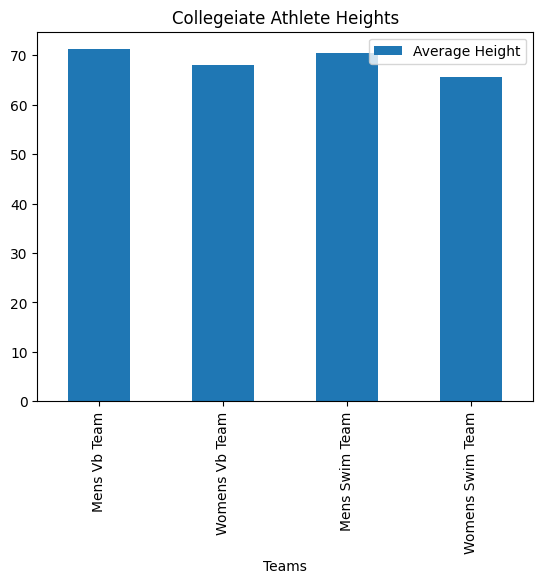

In [17]:
avg_data = {'Teams': ['Mens Vb Team', 'Womens Vb Team','Mens Swim Team','Womens Swim Team'],
            'Average Height': [mens_vb_avg,womens_vb_avg,mens_swim_avg,womens_swim_avg] }

avg_data_df = pd.DataFrame(avg_data)
avg_data_df.plot.bar(x = 'Teams',y = 'Average Height', title = 'Collegeiate Athlete Heights')


SQL DATABASE ORGANIZATION FOR ALL FOUR TEAMS


In [18]:
#Men Volleyball Team
mens_vb_df = pd.DataFrame(data1)

db_conn = sqlite3.connect('mac-eve-ric.db')

cursor = db_conn.cursor()

mens_vb_df.to_sql('mens_vb_df', db_conn, if_exists='replace', index=False)


103

In [19]:
# Execute a SQL query against the database and load the result into a DataFrame
mens_vb_df_from_db = pd.read_sql_query('SELECT * FROM mens_vb_df', db_conn)

# Display the resulting DataFrame
print(mens_vb_df_from_db)

                    Name  Height           Sport
0         Shakib Delowar      71  Men Volleyball
1         Brandon  Green      72  Men Volleyball
2             Reng  Chen      69  Men Volleyball
3           Anirudha Das      68  Men Volleyball
4          Gabriel Linus      75  Men Volleyball
..                   ...     ...             ...
98         George Molina      72  Men Volleyball
99      Stanley  Sanchez      68  Men Volleyball
100      Sebastian Gomez      76  Men Volleyball
101  David Heyliger, Jr.      73  Men Volleyball
102          Ryan Tulsie      70  Men Volleyball

[103 rows x 3 columns]


In [20]:
#Women Volleyball Team
womens_vb_df = pd.DataFrame(data2)

db_conn = sqlite3.connect('mac-eve-ric.db')

cursor = db_conn.cursor()

womens_vb_df.to_sql('womens_vb_df', db_conn, if_exists='replace', index=False)

129

In [21]:
# Execute a SQL query against the database and load the result into a DataFrame
womens_vb_df_from_db = pd.read_sql_query('SELECT * FROM womens_vb_df', db_conn)

# Display the resulting DataFrame
print(womens_vb_df_from_db)

                 Name  Height             Sport
0         Amy Criollo      63  Women Volleyball
1      Jamielee Adomo      62  Women Volleyball
2    Emmanuella Aurel      66  Women Volleyball
3       Josanne Lewis      67  Women Volleyball
4     Garyana Altidor      61  Women Volleyball
..                ...     ...               ...
124      Erin Ferello      65  Women Volleyball
125      Alyssa Daley      75  Women Volleyball
126     Myka Costanzo      64  Women Volleyball
127  Kyleigh McDermit      71  Women Volleyball
128    Katrina Cowder      71  Women Volleyball

[129 rows x 3 columns]


In [22]:
#Men Swimming Team
mens_swim_df = pd.DataFrame(data3)

db_conn = sqlite3.connect('mac-eve-ric.db')

cursor = db_conn.cursor()

mens_swim_df.to_sql('mens_swim_df', db_conn, if_exists='replace', index=False)


191

In [23]:
# Execute a SQL query against the database and load the result into a DataFrame
mens_swim_df_from_db = pd.read_sql_query('SELECT * FROM mens_swim_df', db_conn)

# Display the resulting DataFrame
print(mens_swim_df_from_db)

                     Name  Height     Sport
0    Anthony Attenborough      70  Men Swim
1            James Curran      69  Men Swim
2        Charles Cusumano      64  Men Swim
3         David Fayngersh      70  Men Swim
4          Michael Graham      70  Men Swim
..                    ...     ...       ...
186        Kieran Hassard      72  Men Swim
187         Anthony Laite      69  Men Swim
188        Drew MacDonald      72  Men Swim
189           Kyle Morken      73  Men Swim
190      Peter Vanderwerf      75  Men Swim

[191 rows x 3 columns]


In [24]:
#Women Swimming Team
womens_swim_df = pd.DataFrame(data4)

db_conn = sqlite3.connect('mac-eve-ric.db')

cursor = db_conn.cursor()

womens_swim_df.to_sql('womens_swim_df', db_conn, if_exists='replace', index=False)


154

In [25]:
# Execute a SQL query against the database and load the result into a DataFrame
womens_swim_df_from_db = pd.read_sql_query('SELECT * FROM womens_swim_df', db_conn)

# Display the resulting DataFrame
print(womens_swim_df_from_db)

                    Name  Height       Sport
0     Aurelia Barbagallo      63  Women Swim
1    Jacqueline DeFranco      65  Women Swim
2      Katherine Ebrahim      69  Women Swim
3       Jessica  Johnson      68  Women Swim
4         Brooke Manning      66  Women Swim
..                   ...     ...         ...
149      Paige Splendido      65  Women Swim
150      Emma Stephenson      67  Women Swim
151       Callie Stinson      64  Women Swim
152       Jessie Triller      62  Women Swim
153         Emma Trumino      65  Women Swim

[154 rows x 3 columns]
